### 임상도 데이터 EDA

In [2]:
import geopandas as gpd

In [26]:
# 서울 특별시 임상도 파일 불러오기
gdf = gpd.read_file("../data/raw/임상도_서울특별시/11.shp")

In [27]:
gdf.crs

<Projected CRS: ESRI:102080>
Name: KGD2002_Unified_Coordinate_System
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: Korean Geodetic Datum 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [28]:
#좌표계 확인 및 변환 (EPSG:5179은 UTM-K 기준), GeoPandas에서의 분석을 위해 변환
if gdf.crs != "epsg:5179":
    gdf = gdf.to_crs(epsg=5179)
    print("Coordinate Reference System Converted")

Coordinate Reference System Converted


In [29]:
gdf.crs

<Projected CRS: EPSG:5179>
Name: KGD2002 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Korean Geodetic Datum 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [31]:
gdf.head(3)

,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,HEIGHT,LDMARK_STN,MAP_LABEL,...,ETC_PCMTT,FRTP_NM,KOFTR_NM,DMCLS_NM,AGCLS_NM,DNST_NM,HEIGHT_NM,Shape_Leng,Shape_Area,geometry
0,0,0,0,93,None,None,None,None,J00093,C,...,None,무립목지/비산림,경작지,None,None,None,None,194.705027,1847.918451,"POLYGON ((940406.869 1943144.09, 940402.484 19..."
1,0,0,0,93,None,None,None,None,J00093,C,...,None,무립목지/비산림,경작지,None,None,None,None,570.219024,12748.592620,"POLYGON ((941247.331 1942388.402, 941247.768 1..."
2,1,1,1,12,1,3,C,08,J11112,APK-13C,...,None,침엽수림,잣나무,소경목,3영급,밀,임분고 7m 이상 9m미만,248.713445,2053.461999,"POLYGON ((940653.223 1942760.494, 940653.815 1..."


In [32]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7640 entries, 0 to 7639
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STORUNST    7640 non-null   object  
 1   FROR_CD     7640 non-null   object  
 2   FRTP_CD     7640 non-null   object  
 3   KOFTR_GROU  7640 non-null   object  
 4   DMCLS_CD    6374 non-null   object  
 5   AGCLS_CD    6374 non-null   object  
 6   DNST_CD     6374 non-null   object  
 7   HEIGHT      6374 non-null   object  
 8   LDMARK_STN  7640 non-null   object  
 9   MAP_LABEL   7640 non-null   object  
 10  갱신년도        5360 non-null   object  
 11  ETC_PCMTT   1068 non-null   object  
 12  FRTP_NM     7640 non-null   object  
 13  KOFTR_NM    7640 non-null   object  
 14  DMCLS_NM    6374 non-null   object  
 15  AGCLS_NM    6374 non-null   object  
 16  DNST_NM     6374 non-null   object  
 17  HEIGHT_NM   6374 non-null   object  
 18  Shape_Leng  7640 non-null   float64 
 19

In [33]:
gdf.shape

(7640, 21)

### 대한민국 행정지역 데이터 EDA

In [3]:
gdf = gpd.read_file("../data/raw/sig_20230729/sig.shp", encoding="euc-kr")

In [4]:
gdf.head(5)

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.058 1952633.25, 964875.565 19..."


In [6]:
gdf.shape

(250, 4)

In [9]:
gdf.crs

<Axes: >

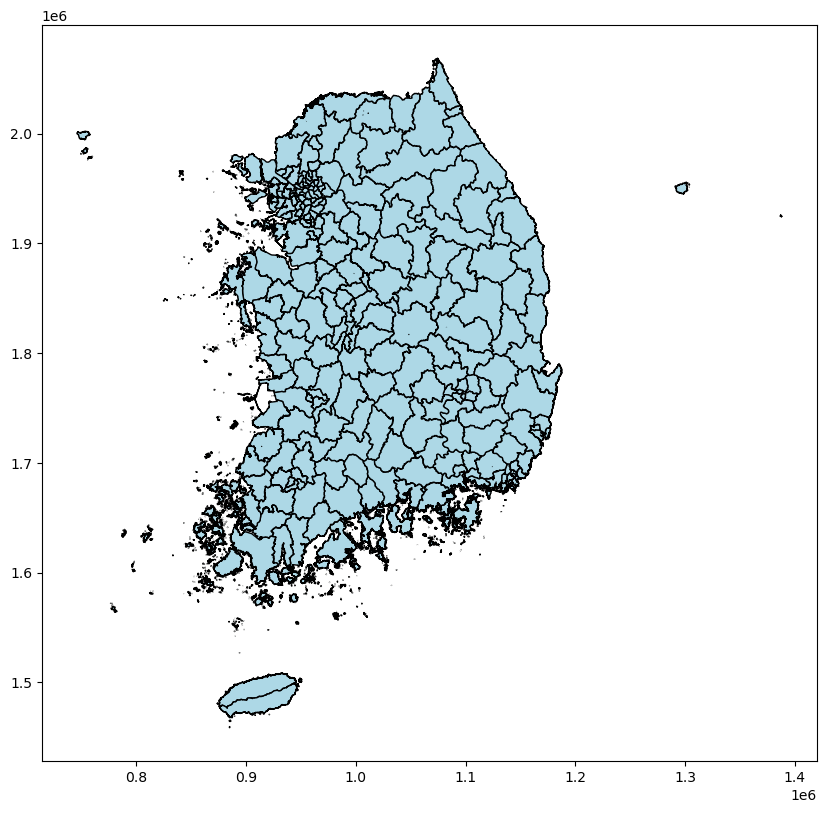

In [5]:
gdf.plot(figsize=(10, 12), edgecolor="black", facecolor="lightblue")

<Axes: >

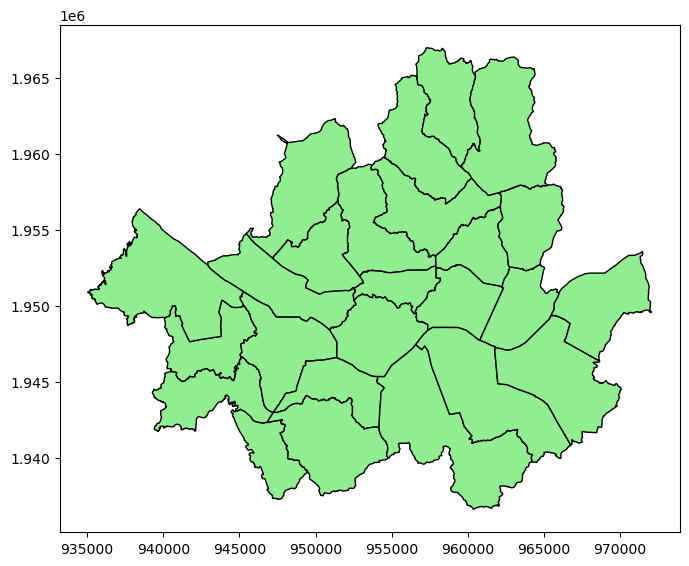

In [7]:
# 서울시만 필터링 (코드가 '11'로 시작)
seoul = gdf[gdf["SIG_CD"].str.startswith("11")]
# 시각화
seoul.plot(figsize=(8, 8), edgecolor="black", facecolor="lightgreen")